<a href="https://colab.research.google.com/github/ccopenh1/personal-projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Problem Introduction**

The educational system in Portugal faces a significant challenge in addressing high student failure rates, particularly in core subjects like Mathematics and Portuguese language. Despite improvements in the overall educational level, the persistence of student failures remains a concern. The need to enhance student achievement in secondary education has prompted the exploration of Business Intelligence (BI) and Data Mining (DM) techniques to extract valuable insights from student-related data.

**Dataset Introduction**

The dataset comprises real-world data collected from two Portuguese schools, focusing on student grades, demographic information, social factors, and school-related features. The information was gathered through school reports and questionnaires, offering a comprehensive view of students' academic performance and related attributes. This project aims to make use of Decision Trees, Random Forest, K-Nearest Neighbors, and Naive-Bayes to predict student achievement based on the provided features.

**Additional Info:**

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)


2 sex - student's sex (binary: 'F' - female or 'M' - male)


3 age - student's age (numeric: from 15 to 22)


4 address - student's home address type (binary: 'U' - urban or 'R' - rural)


5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)


6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)


7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)


8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)


9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')


12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')


13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)


14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)


16 schoolsup - extra educational support (binary: yes or no)


17 famsup - family educational support (binary: yes or no)


18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)


19 activities - extra-curricular activities (binary: yes or no)


20 nursery - attended nursery school (binary: yes or no)


21 higher - wants to take higher education (binary: yes or no)


22 internet - Internet access at home (binary: yes or no)


23 romantic - with a romantic relationship (binary: yes or no)


24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)


28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


29 health - current health status (numeric: from 1 - very bad to 5 - very good)


30 absences - number of school absences (numeric: from 0 to 93)



# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)


31 G2 - second period grade (numeric: from 0 to 20)


32 G3 - final grade (numeric: from 0 to 20, output target)



# Data Preprocessing

The primary steps for preprocessing this data include importing necessary Python libraries such as pandas and scikit learn, creating data frames from our csv data, checking for and eliminating (if any) null values, checking all column datatypes and one-hot encoding non numerical data as numerical data for the classifier model to work with.

import all necessary python libraries/packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.inspection import permutation_importance

create dataframe with csv values

In [2]:
mat_df = pd.read_csv("student-mat.csv", sep=';')
por_df = pd.read_csv("student-por.csv", sep=';')

peek at dataframes

In [3]:
mat_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
por_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

analyze shape of dataframes. we have 33 columns for both

In [5]:
mat_df.shape

(395, 33)

In [6]:
por_df.shape

(649, 33)

In [7]:
mat_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [8]:
por_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

any null values?

In [9]:
mat_df.isna().sum() #no nulls!

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
por_df.isna().sum() #no nulls!

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Check datatypes

In [11]:
mat_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [12]:
por_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

We need to convert all non numerical data into numerical data by using one-hot encoding with pd.get_dummies

In [13]:
matdf_encoded = pd.get_dummies(mat_df)
pordf_encoded = pd.get_dummies(por_df)


In [14]:
matdf_encoded.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

In [15]:
pordf_encoded.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

Our data is good to go! Lets start visualizing.

# Data Understanding/Visualization

The first step is to identify features that might be useful for predicting the target value (failures)

<Axes: xlabel='failures', ylabel='count'>

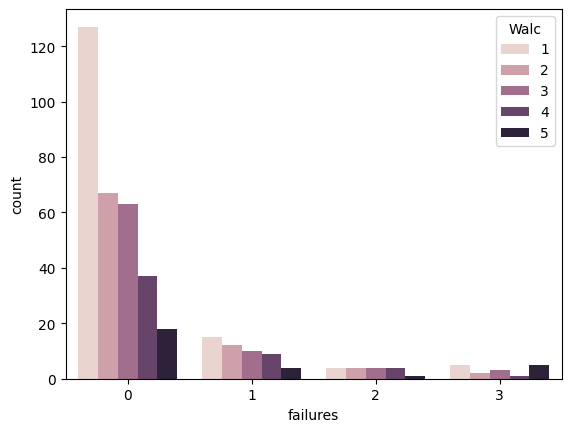

In [46]:
sns.countplot(x = 'failures', data= mat_df, hue = 'Walc')

<Axes: xlabel='failures', ylabel='count'>

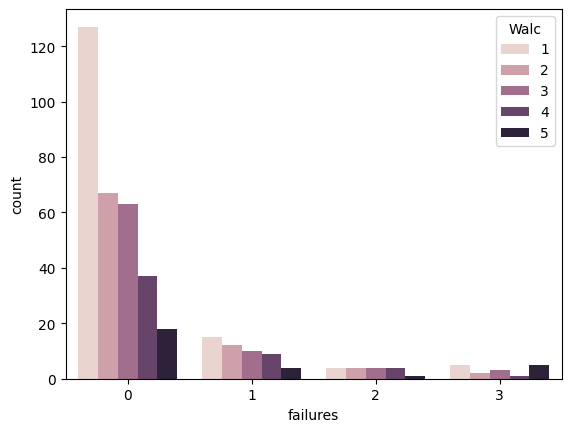

In [47]:
sns.countplot(x = 'failures', data= mat_df, hue = 'Walc')

<Axes: xlabel='failures', ylabel='count'>

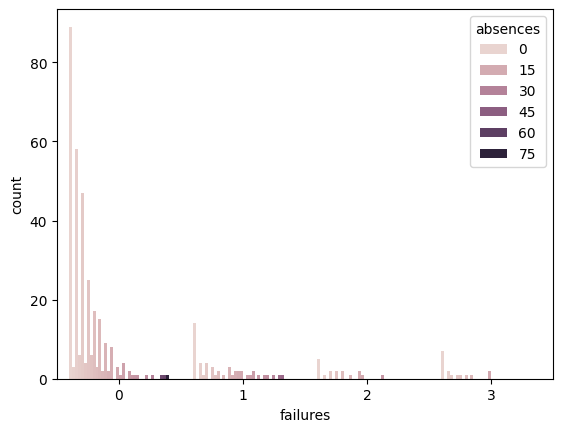

In [44]:
sns.countplot(x = 'failures', data= mat_df, hue = 'absences')

<Axes: xlabel='failures', ylabel='count'>

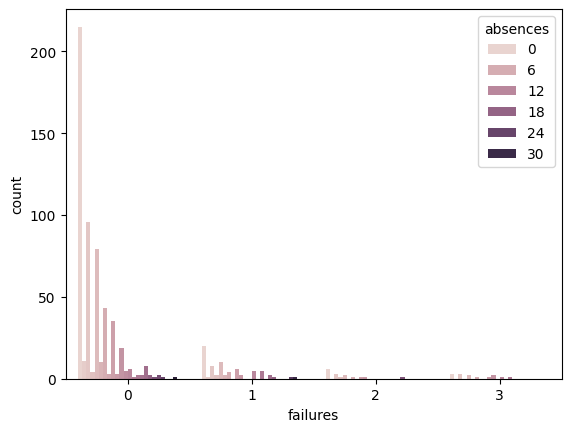

In [40]:
sns.countplot(x = 'failures', data= por_df, hue = 'absences')

# First lets train a model on the mathematics dataset

In [48]:
matdf_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [21]:
X = matdf_encoded.drop(['failures'], axis =1)
y = matdf_encoded['failures']

In [22]:
X.shape, y.shape

((395, 58), (395,))

In [23]:
X

age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     18     4     4           2          2       4         3      4     1   
1     17     1     1           1          2       5         3      3     1   
2     15     1     1           1          2       4         3      2     2   
3     15     4     2           1          3       3         2      2     1   
4     16     3     3           1          2       4         3      2     1   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
390   20     2     2           1          2       5         5      4     4   
391   17     3     1           2          1       2         4      5     3   
392   21     1     1           1          1       5         5      3     3   
393   18     3     2           3          1       4         4      1     3   
394   19     1     1           1          1       3         2      3     3   

     Walc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0       1  ...              1               0           0            1   
1       1  ...              1               0           1            0   
2       3  ...              1               0           0            1   
3       1  ...              0               1           0            1   
4       2  ...              1               0           0            1   
..    ...  ...            ...             ...         ...          ...   
390     5  ...              1               0           0            1   
391     4  ...              1               0           1            0   
392     3  ...              1               0           1            0   
393     4  ...              1               0           1            0   
394     3  ...              1               0           0            1   

     higher_no  higher_yes  internet_no  internet_yes  romantic_no  \
0            0           1            1             0            1   
1            0           1            0             1            1   
2            0           1            0             1            1   
3            0           1            0             1            0   
4            0           1            1             0            1   
..         ...         ...          ...           ...          ...   
390          0           1            1             0            1   
391          0           1            0             1            1   
392          0           1            1             0            1   
393          0           1            0             1            1   
394          0           1            0             1            1   

     romantic_yes  
0               0  
1               0  
2               0  
3               1  
4               0  
..            ...  
390             0  
391             0  
392             0  
393             0  
394             0  

[395 rows x 58 columns]

In [24]:
y

0      0
1      0
2      3
3      0
4      0
      ..
390    2
391    0
392    3
393    0
394    0
Name: failures, Length: 395, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 58), (79, 58), (316,), (79,))

In [27]:
model = tree.DecisionTreeClassifier() # initialize our model

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
model.score(X_test, y_test)

0.7088607594936709

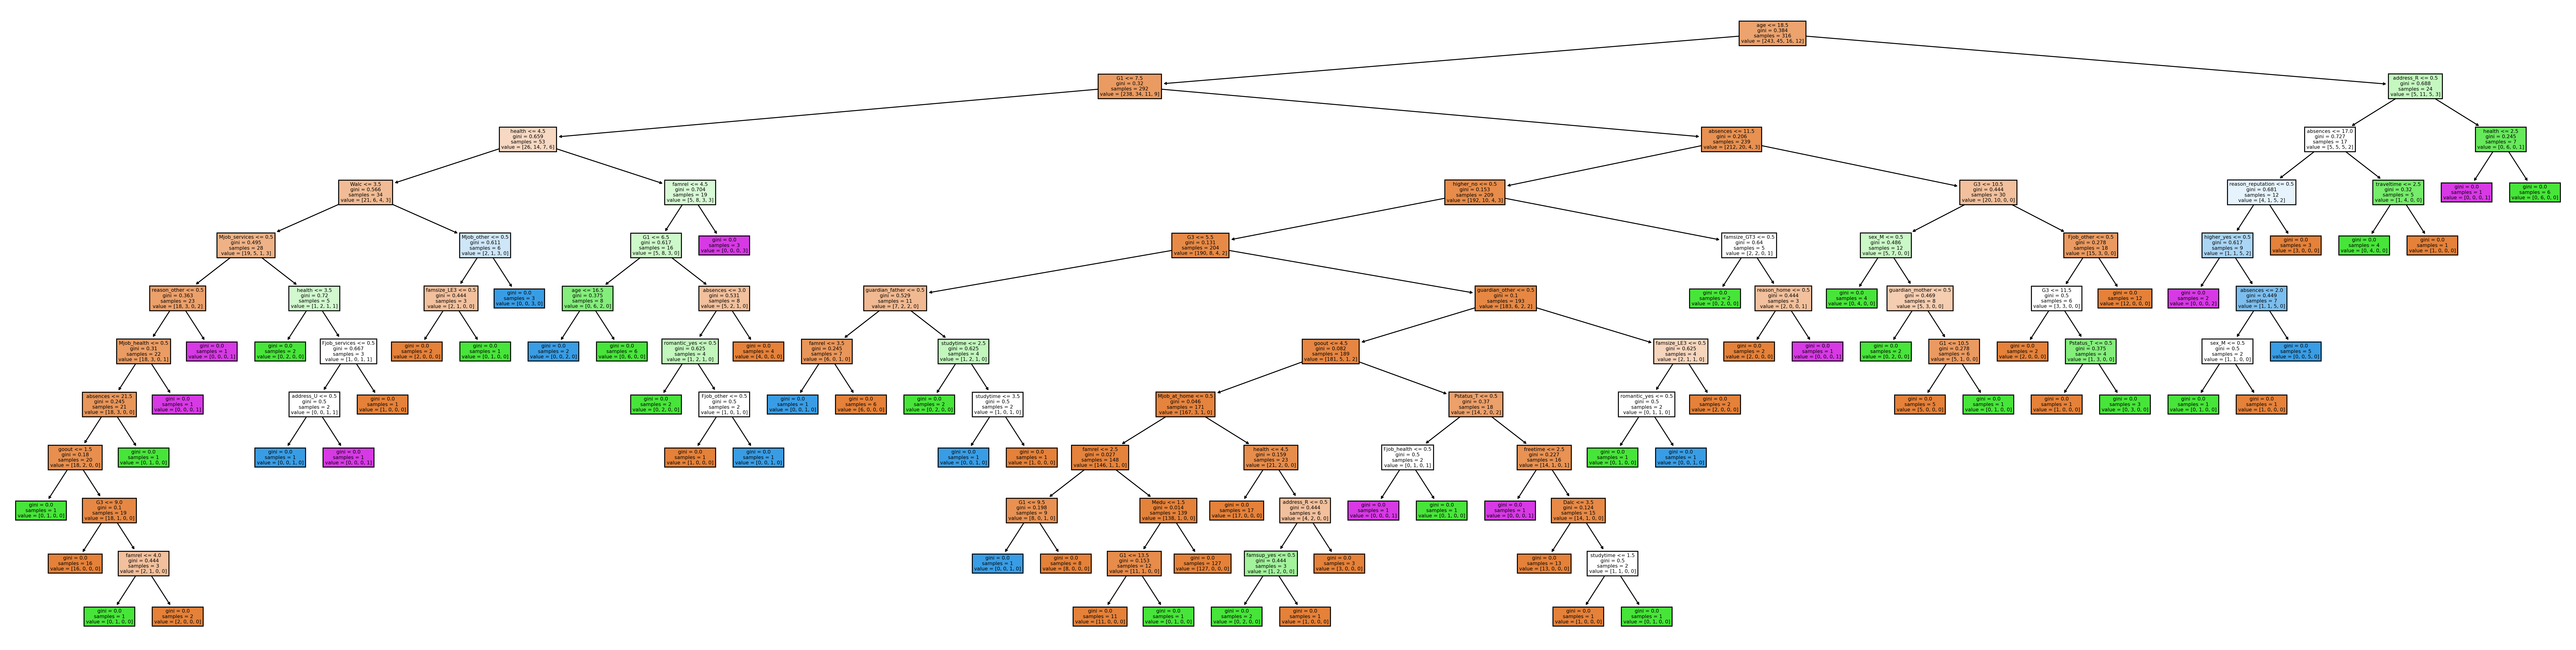

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (48,12), dpi=300)
tree.plot_tree(model, max_depth = None, feature_names = X.columns, filled=True)
plt.show()

In [31]:
fi = model.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

<ipython-input-32-7d020cb7ea87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
<ipython-input-32-7d020cb7ea87>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


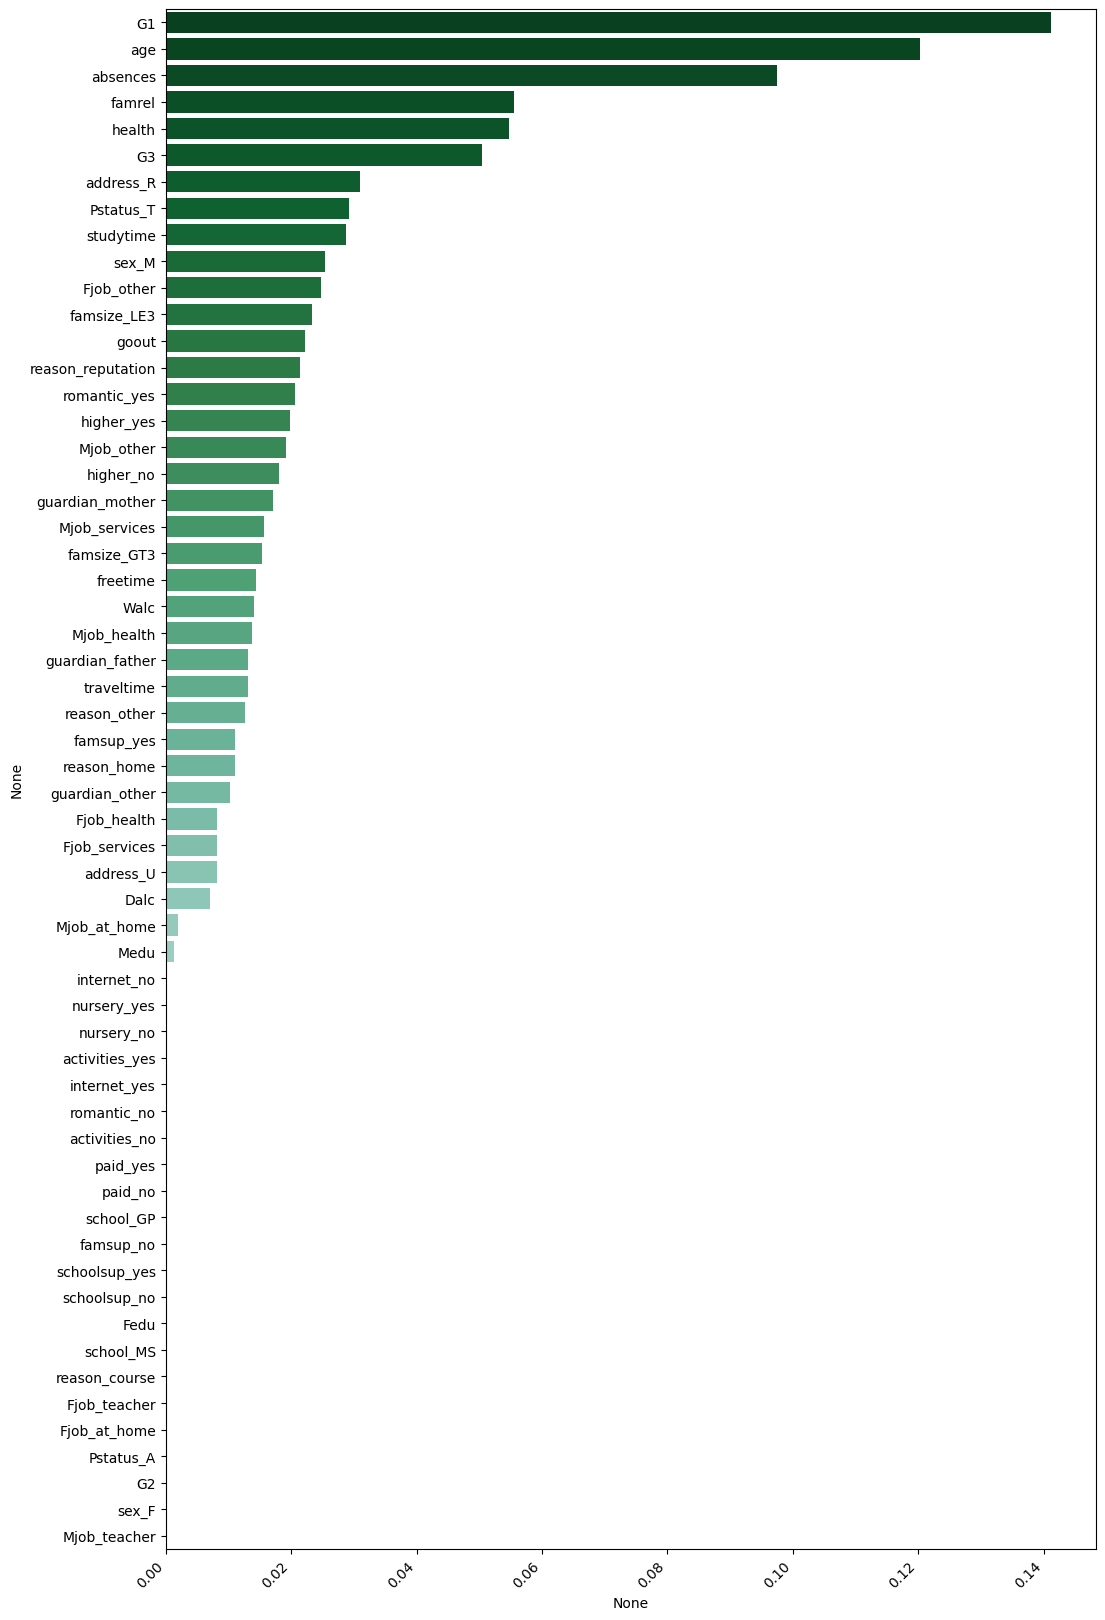

In [32]:
#create bar plot
plt.figure(figsize=(12, 20))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [33]:
predicted = model.predict(X_test)

In [34]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        69
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       1.00      0.25      0.40         4

    accuracy                           0.71        79
   macro avg       0.48      0.26      0.31        79
weighted avg       0.86      0.71      0.77        79



In [35]:
confusion_matrix(y_test, predicted)

array([[55, 10,  4,  0],
       [ 2,  0,  3,  0],
       [ 1,  0,  0,  0],
       [ 1,  1,  1,  1]])

Row 1 (True Class 0): There are 55 instances predicted as class 0 (True Positives), 10 instances predicted as class 1 but actually belonging to class 0 (False Positives), 4 instances predicted as class 2 but actually belonging to class 0 (False Positives), and 0 instances predicted as class 3 but actually belonging to class 0. Row 2 (True Class 1): There are 2 instances predicted as class 0 but actually belonging to class 1 (False Negatives), 0 instances predicted as class 1 (True Positives), 3 instances predicted as class 2 but actually belonging to class 1 (False Positives), and 0 instances predicted as class 3 but actually belonging to class 1. Row 3 (True Class 2): There is 1 instance predicted as class 0 but actually belonging to class 2 (False Negatives), 0 instances predicted as class 1 but actually belonging to class 2, 0 instances predicted as class 2 (True Positives), and 0 instances predicted as class 3 but actually belonging to class 2. Row 4 (True Class 3): There is 1 instance predicted as class 0 but actually belonging to class 3 (False Negatives), 1 instance predicted as class 1 but actually belonging to class 3 (False Negatives), 1 instance predicted as class 2 but actually belonging to class 3 (False Negatives), and 1 instance predicted as class 3 (True Positives).

RANDOM FORESTS

In [67]:
model = RandomForestClassifier(max_depth = 100, max_features = 10, n_estimators = 10)
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.8384615384615385

In [69]:
confusion_matrix(y_test, predicted)

array([[107,   2,   0,   0],
       [ 12,   2,   0,   0],
       [  2,   2,   0,   0],
       [  2,   1,   0,   0]])

NAIVE-BAYES

In [71]:
model = GaussianNB()

In [72]:
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.25384615384615383

In [73]:
confusion_matrix(y_test, predicted)

array([[29,  3, 17, 60],
       [ 1,  1,  2, 10],
       [ 0,  0,  2,  2],
       [ 0,  0,  2,  1]])

KNN

In [77]:
parameters = {'n_neighbors': [1,5,10,15,20]}
KNN = KNeighborsClassifier()
model = GridSearchCV(KNN, parameters)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8307692307692308

In [78]:
confusion_matrix(y_test, predicted)

array([[29,  3, 17, 60],
       [ 1,  1,  2, 10],
       [ 0,  0,  2,  2],
       [ 0,  0,  2,  1]])

# Now let's work with the Portuguese dataset

In [49]:
pordf_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [51]:
X = pordf_encoded.drop(['failures'], axis =1)
y = pordf_encoded['failures']

In [52]:
X.shape, y.shape

((649, 58), (649,))

In [53]:
X

age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     18     4     4           2          2       4         3      4     1   
1     17     1     1           1          2       5         3      3     1   
2     15     1     1           1          2       4         3      2     2   
3     15     4     2           1          3       3         2      2     1   
4     16     3     3           1          2       4         3      2     1   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   19     2     3           1          3       5         4      2     1   
645   18     3     1           1          2       4         3      4     1   
646   18     1     1           2          2       1         1      1     1   
647   17     3     1           2          1       2         4      5     3   
648   18     3     2           3          1       4         4      1     3   

     Walc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0       1  ...              1               0           0            1   
1       1  ...              1               0           1            0   
2       3  ...              1               0           0            1   
3       1  ...              0               1           0            1   
4       2  ...              1               0           0            1   
..    ...  ...            ...             ...         ...          ...   
644     2  ...              0               1           1            0   
645     1  ...              1               0           0            1   
646     1  ...              0               1           0            1   
647     4  ...              1               0           1            0   
648     4  ...              1               0           1            0   

     higher_no  higher_yes  internet_no  internet_yes  romantic_no  \
0            0           1            1             0            1   
1            0           1            0             1            1   
2            0           1            0             1            1   
3            0           1            0             1            0   
4            0           1            1             0            1   
..         ...         ...          ...           ...          ...   
644          0           1            0             1            1   
645          0           1            0             1            1   
646          0           1            1             0            1   
647          0           1            0             1            1   
648          0           1            0             1            1   

     romantic_yes  
0               0  
1               0  
2               0  
3               1  
4               0  
..            ...  
644             0  
645             0  
646             0  
647             0  
648             0  

[649 rows x 58 columns]

In [54]:
y

0      0
1      0
2      0
3      0
4      0
      ..
644    1
645    0
646    0
647    0
648    0
Name: failures, Length: 649, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((519, 58), (130, 58), (519,), (130,))

In [56]:
model = tree.DecisionTreeClassifier() # initialize our model

In [57]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
model.score(X_test, y_test)

0.8384615384615385

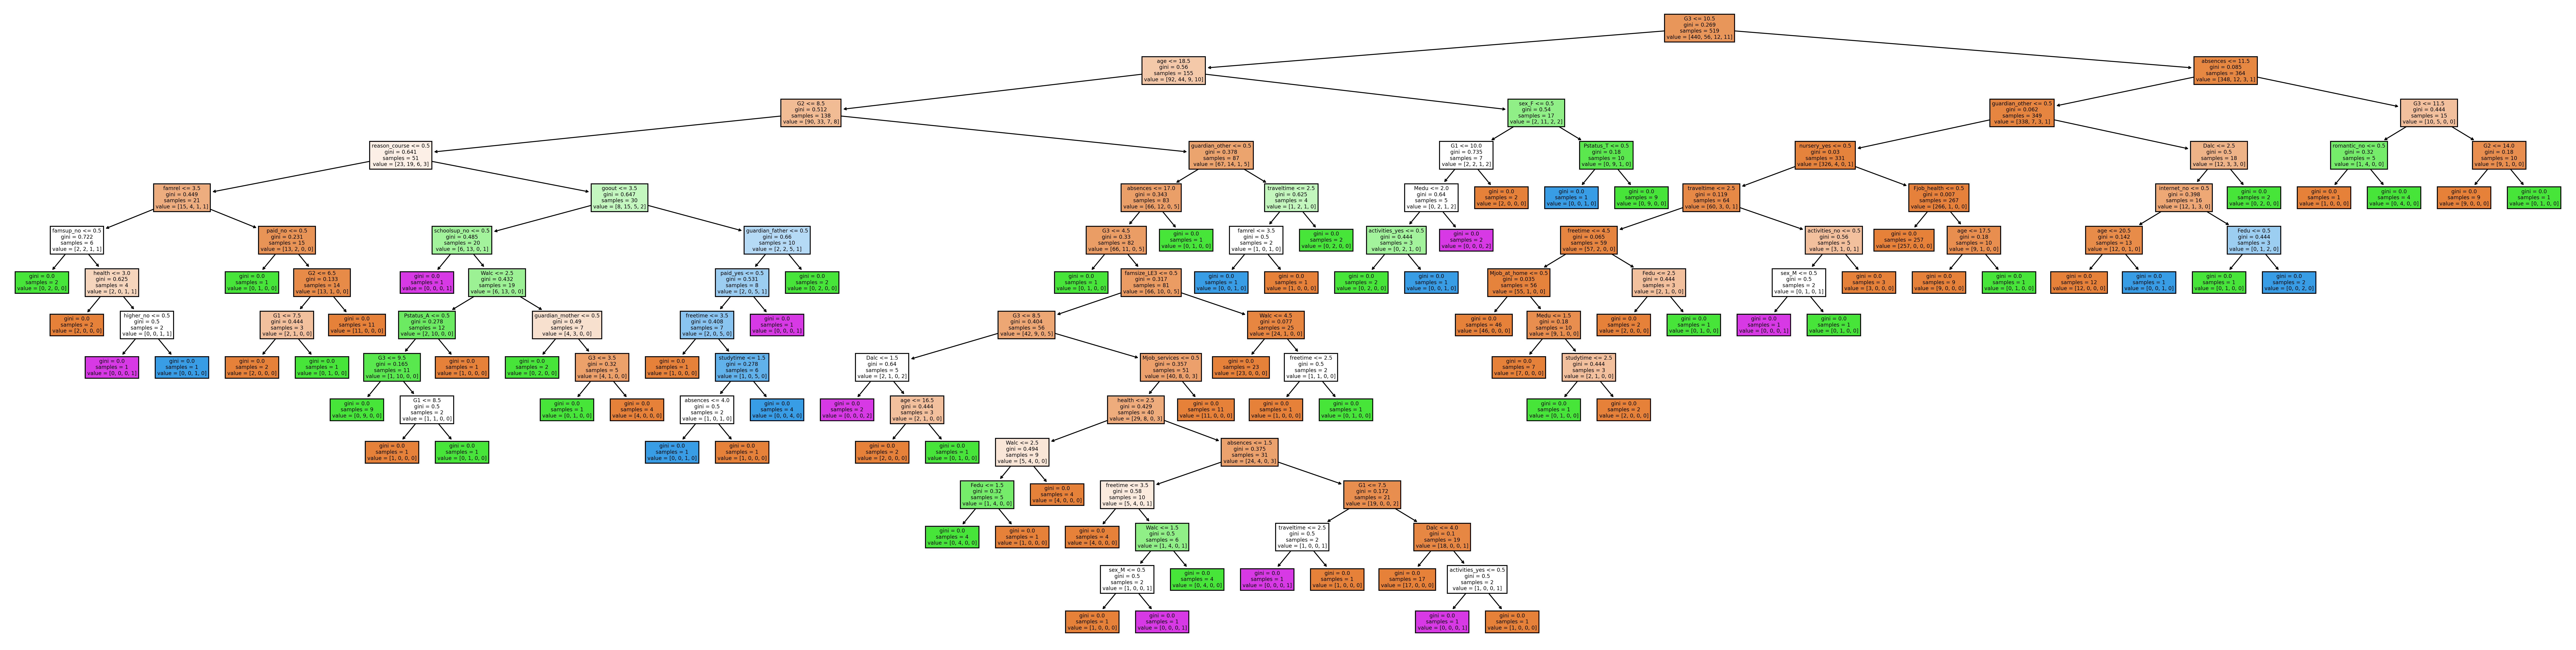

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (48,12), dpi=300)
tree.plot_tree(model, max_depth = None, feature_names = X.columns, filled=True)
plt.show()

<ipython-input-59-f737616a7859>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
<ipython-input-59-f737616a7859>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


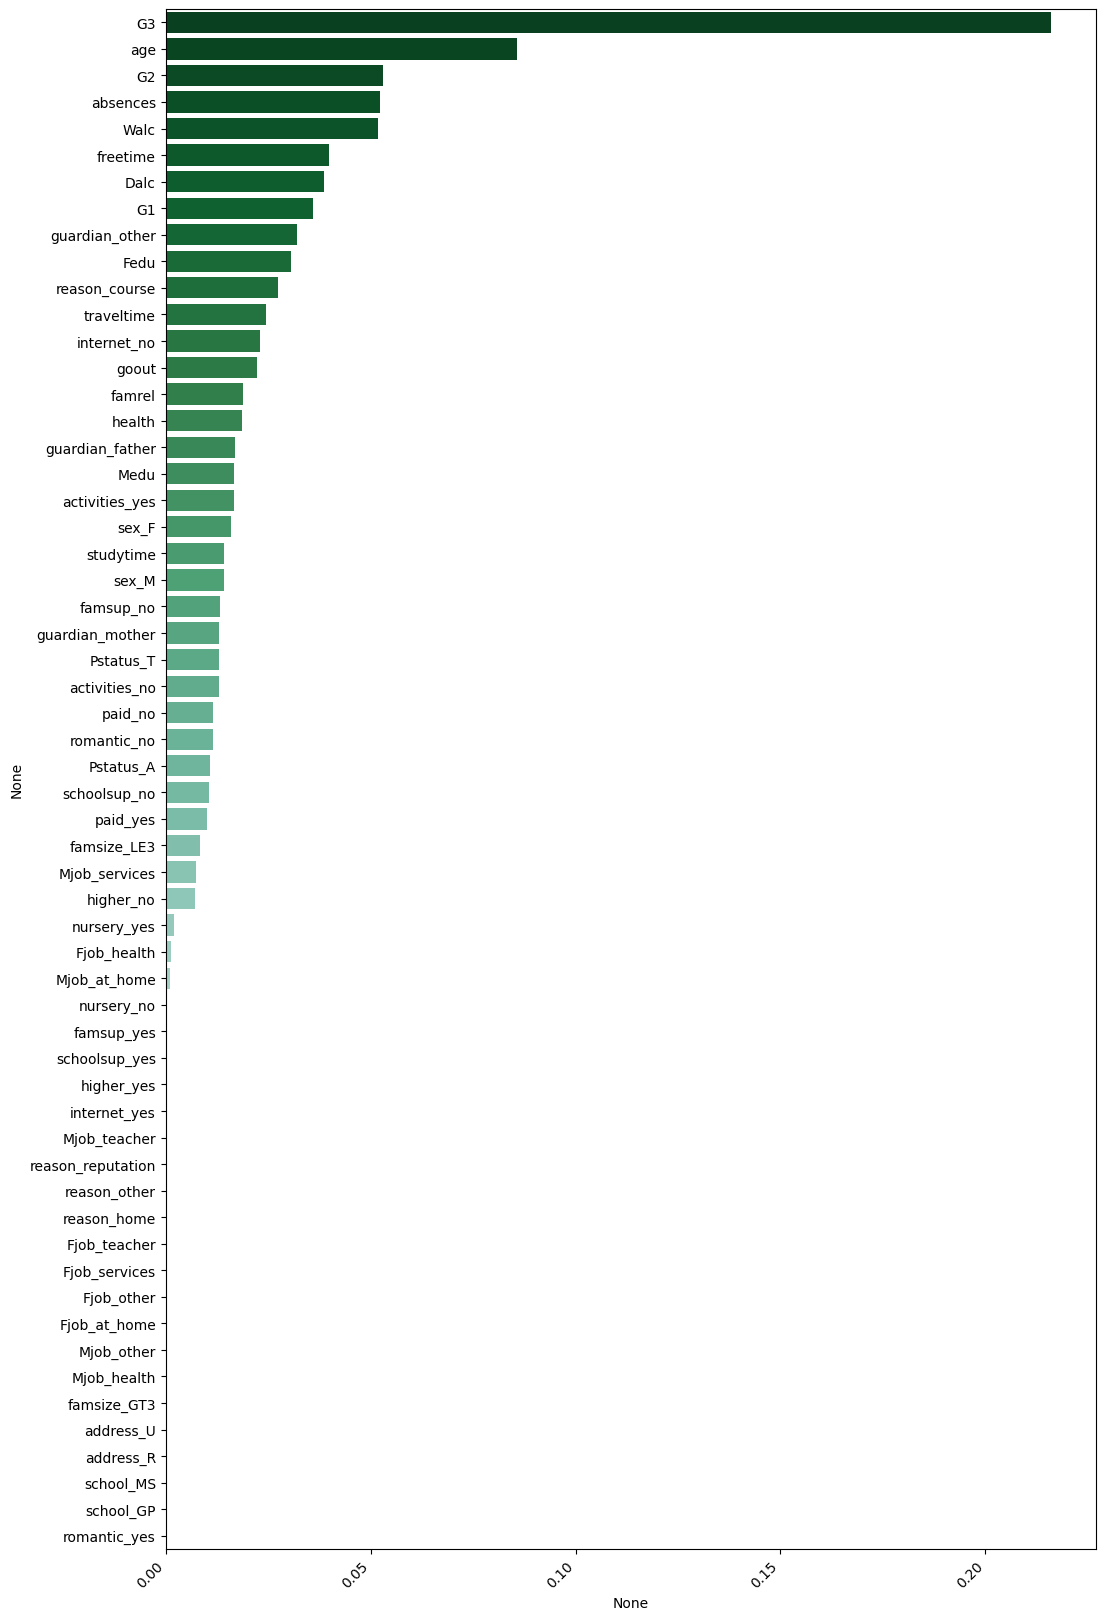

In [59]:
fi = model.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending
#create bar plot
plt.figure(figsize=(12, 20))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [60]:
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       109
           1       0.20      0.14      0.17        14
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         3

    accuracy                           0.77       130
   macro avg       0.32      0.32      0.32       130
weighted avg       0.76      0.77      0.76       130



In [61]:
confusion_matrix(y_test, predicted)

array([[97,  6,  2,  4],
       [12,  2,  0,  0],
       [ 2,  1,  1,  0],
       [ 0,  1,  2,  0]])

RANDOM FORESTS

In [64]:
model = RandomForestClassifier(max_depth = 100, max_features = 10, n_estimators = 10)

In [66]:
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.823076923076923

NAIVE-BAYES

In [62]:
model = GaussianNB()
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.25384615384615383

KNN

In [63]:
parameters = {'n_neighbors': [1,5,10,15,20]}
KNN = KNeighborsClassifier()
model = GridSearchCV(KNN, parameters)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8307692307692308

# Storytelling and Evaluation/Reflections

For the Math dataset:

Decision Tree: Accuracy of 0.7089 means the model correctly classified approximately 70.89% of instances. Random Forest: Accuracy of 0.8385 indicates a higher performance, correctly classifying around 83.85% of instances. Naive Bayes: Accuracy of 0.2152 is relatively low, suggesting poor performance on this data. KNN: Accuracy of 0.8228 is quite high, indicating that KNN performed well on this data.

For the Portuguese language dataset:

Decision Tree: Accuracy of 0.8385 implies good performance, correctly classifying approximately 83.85% of instances. Random Forest: Accuracy of 0.8231 suggests a high level of correctness, around 82.31%. Naive Bayes: Accuracy of 0.2538 is low, indicating that Naive Bayes performed poorly on this data. KNN: Accuracy of 0.8308 suggests that KNN performed well on this data, similar to the Math dataset.



For both datasets, two of the most important features as displayed in the feauture importance bar graphs were number of absences, parents' job and education, and alcohol consumption. High rates of absenteeism can be indicative of disengagement, lack of interest, or other personal challenges that may impact a student's ability to keep up with coursework. Students from families with higher educational attainment and stable employment may have access to more resources and support, contributing to their academic performance. The inclusion of alcohol consumption as a factor is noteworthy. This suggests that the study considers not only academic-related variables but also lifestyle and behavioral aspects. Alcohol consumption could be indicative of certain risk behaviors or challenges that students may face outside the academic environment. Understanding and addressing these non-academic factors can be crucial for providing holistic support to students.

# Impact

The identification of these influencing factors has practical implications for educational institutions. Schools and educators can use predictive models incorporating these variables to identify students at risk of academic underperformance. Early intervention strategies can then be implemented to provide additional support, resources, or counseling to help these students succeed. Additionally, the inclusion of non-academic factors underscores the importance of taking a holistic approach to education. Academic success is not solely determined by classroom performance but is interconnected with various aspects of a student's life. Schools that recognize and address both academic and non-academic challenges contribute to creating a supportive environment for student achievement.

# References

https://archive.ics.uci.edu/dataset/320/student+performance

https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf

Colab AI debugging tool